# Black-Scholes Option Price Sensitivities

**Course**: 2025 Introduction to Quantitative Methods in Finance  
**Institute**: The Erdös Institute


## Objective

Visualize how the **Black-Scholes option price** (for both **calls** and **puts**) changes with:

- Time to maturity (`T`)
- Spot price (`S`)
- First-order derivatives with respect to each of those parameters (∂Price/∂T and ∂Price/∂S)

These derivatives represent how **sensitive the option prices** are to market conditions, which is fundamental for hedging and trading strategies.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# def bs_call_price(S, K, sigma, T, r=0.0):
#     """
#     Computes the Black-Scholes price for a European call option.

#     Parameters:
#         S     : Spot price of the asset
#         K     : Strike price of the option
#         sigma : Volatility (annualized)
#         T     : Time to maturity (in years)
#         r     : Risk-free interest rate

#     Returns:
#         float: Call option price
#     """
#     if T <= 0 or sigma <= 0:
#         return max(S - K, 0)
#     d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
#     d2 = d1 - sigma * np.sqrt(T)
#     return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# def bs_put_price(S, K, sigma, T, r=0.0):
#     """
#     Computes the Black-Scholes price for a European put option.

#     Parameters:
#         S     : Spot price of the asset
#         K     : Strike price of the option
#         sigma : Volatility (annualized)
#         T     : Time to maturity (in years)
#         r     : Risk-free interest rate

#     Returns:
#         float: Put option price
#     """
#     if T <= 0 or sigma <= 0:
#         return max(K - S, 0)
#     d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
#     d2 = d1 - sigma * np.sqrt(T)
#     return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

%run ./utils/options_utils.py

## For Call and Put Options with zero risk-free rate

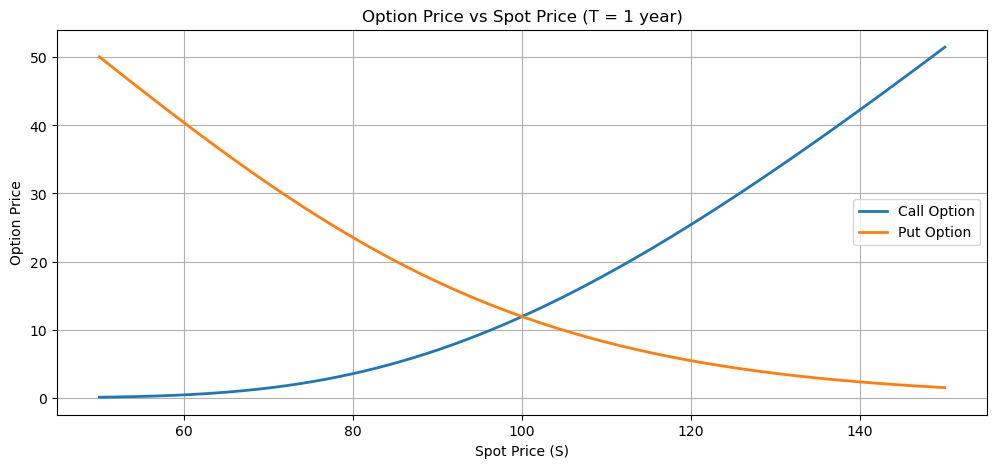

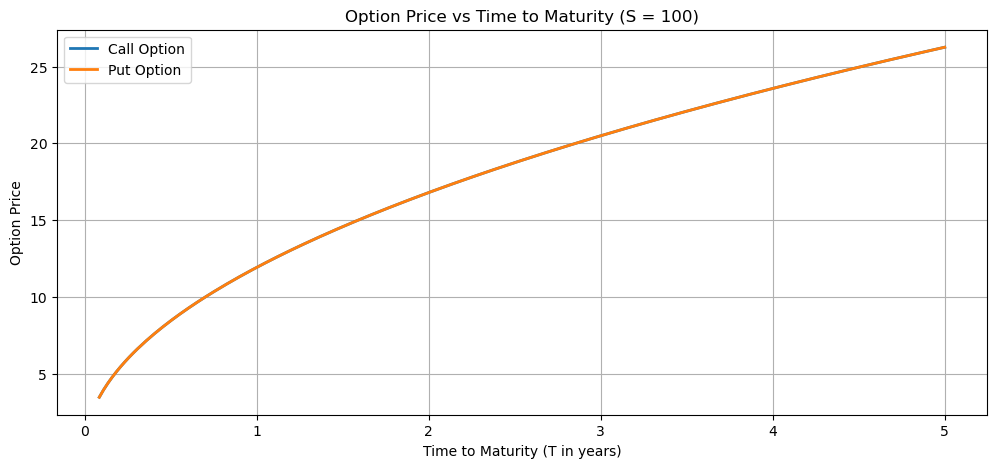

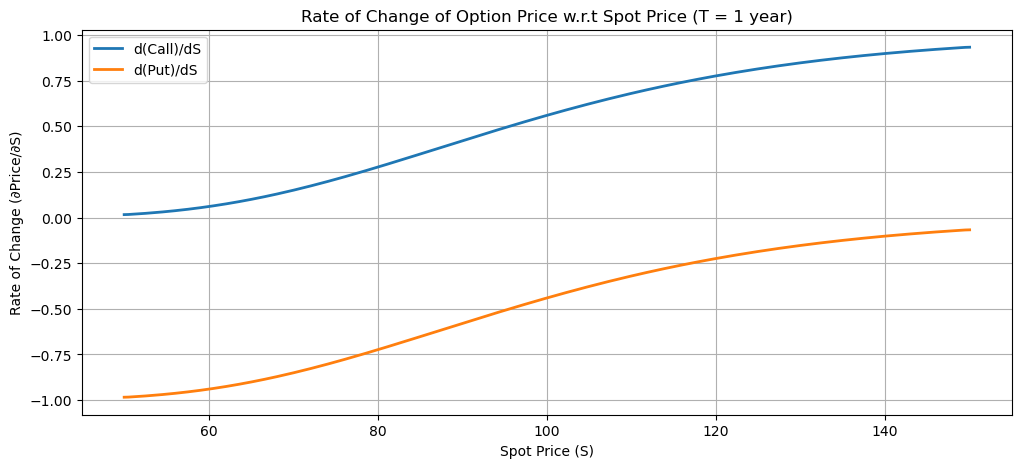

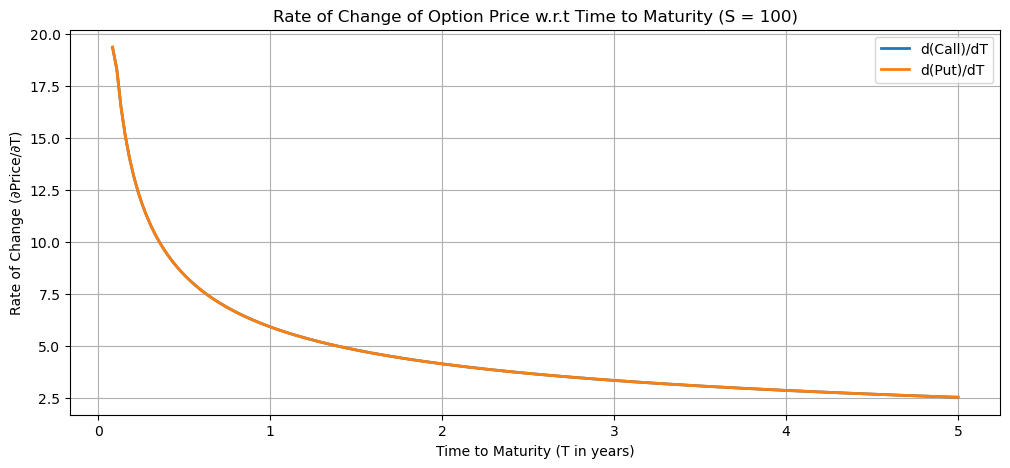

In [6]:
# --- Parameters ---
K = 100      # Strike price
sigma = 0.3  # Volatility
r = 0.00     # Risk-free rate

# Price vs Spot Price (T = 1 year)
S_vals = np.linspace(50, 150, 200)
T_fixed = 1
call_Tfixed = [bs_call_price(S, K, sigma, T_fixed, r) for S in S_vals]
put_Tfixed = [bs_put_price(S, K, sigma, T_fixed, r) for S in S_vals]

plt.figure(figsize=(12, 5))
plt.plot(S_vals, call_Tfixed, label="Call Option", lw=2)
plt.plot(S_vals, put_Tfixed, label="Put Option", lw=2)
plt.title("Option Price vs Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# Price vs Time to Maturity (S = 100)
T_vals = np.linspace(1/12, 5, 200)
S_fixed = 100
call_Sfixed = [bs_call_price(S_fixed, K, sigma, T, r) for T in T_vals]
put_Sfixed = [bs_put_price(S_fixed, K, sigma, T, r) for T in T_vals]

plt.figure(figsize=(12, 5))
plt.plot(T_vals, call_Sfixed, label="Call Option", lw=2)
plt.plot(T_vals, put_Sfixed, label="Put Option", lw=2)
plt.title("Option Price vs Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# First Derivatives: Numerical Gradients

# w.r.t. spot price
dCall_dS = np.gradient(call_Tfixed, S_vals)
dPut_dS = np.gradient(put_Tfixed, S_vals)

# w.r.t. time to maturity
dCall_dT = np.gradient(call_Sfixed, T_vals)
dPut_dT = np.gradient(put_Sfixed, T_vals)


# Derivative w.r.t Spot Price
plt.figure(figsize=(12, 5))
plt.plot(S_vals, dCall_dS, label="d(Call)/dS", lw=2)
plt.plot(S_vals, dPut_dS, label="d(Put)/dS", lw=2)
plt.title("Rate of Change of Option Price w.r.t Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Rate of Change (∂Price/∂S)")
plt.legend()
plt.grid(True)
plt.show()

# Derivative w.r.t Time to Maturity
plt.figure(figsize=(12, 5))
plt.plot(T_vals, dCall_dT, label="d(Call)/dT", lw=2)
plt.plot(T_vals, dPut_dT, label="d(Put)/dT", lw=2)
plt.title("Rate of Change of Option Price w.r.t Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Rate of Change (∂Price/∂T)")
plt.legend()
plt.grid(True)
plt.show()

## For Call and Put Options with Finite risk-free rate (r=0.03)

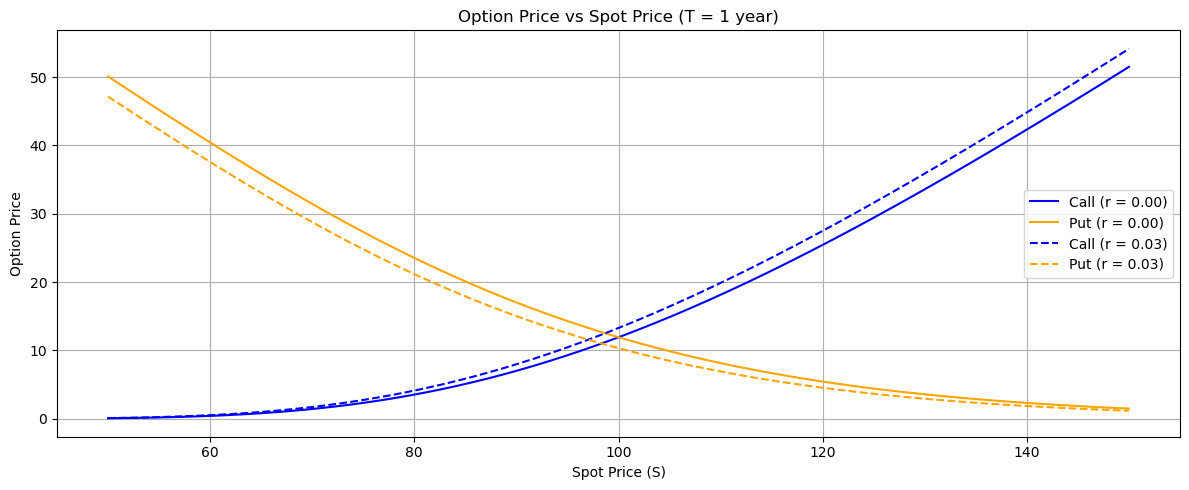

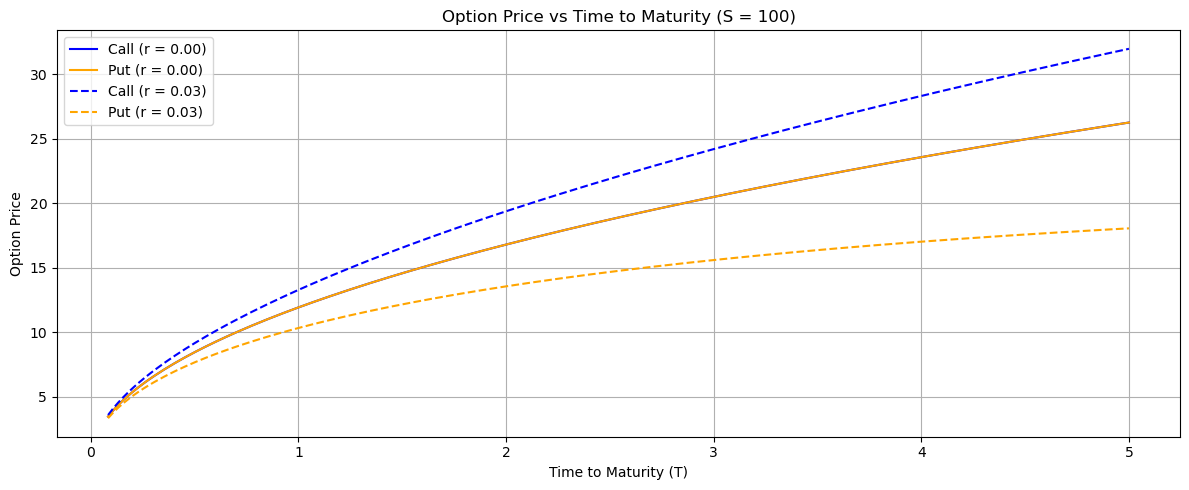

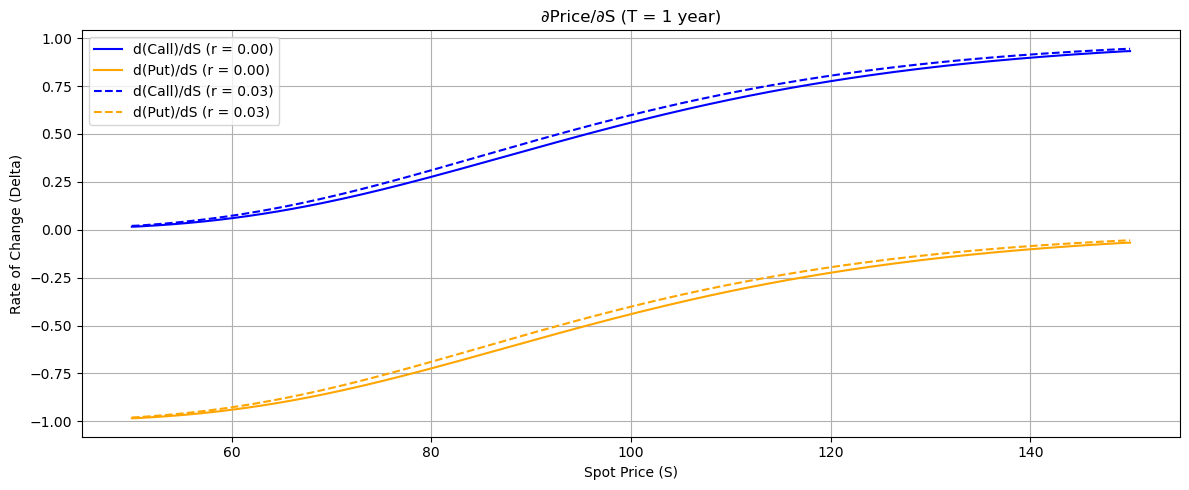

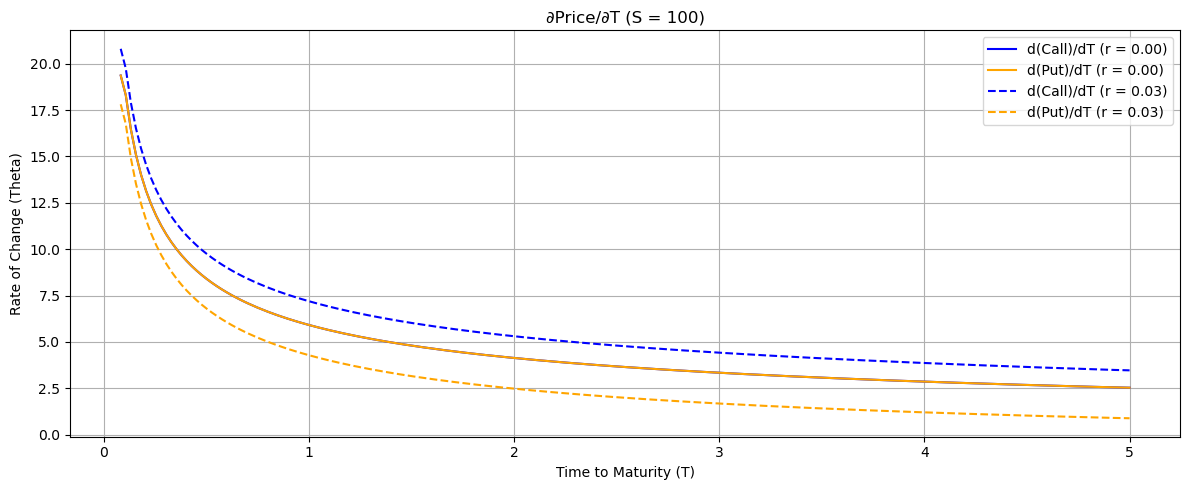

In [7]:
# Parameters 
K = 100
sigma = 0.3
S_fixed = 100
T_fixed = 1
rates = [0.0, 0.03]
linestyles = ['-', '--']
labels = ['r = 0.00', 'r = 0.03']

# Price vs Spot Price
S_vals = np.linspace(50, 150, 200)
plt.figure(figsize=(12, 5))
for r, ls, lbl in zip(rates, linestyles, labels):
    call_prices = [bs_call_price(S, K, sigma, T_fixed, r) for S in S_vals]
    put_prices = [bs_put_price(S, K, sigma, T_fixed, r) for S in S_vals]
    plt.plot(S_vals, call_prices, linestyle=ls, color='blue', label=f'Call ({lbl})')
    plt.plot(S_vals, put_prices, linestyle=ls, color='orange', label=f'Put ({lbl})')
plt.title("Option Price vs Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Price vs Time to Maturity
T_vals = np.linspace(1/12, 5, 200)
plt.figure(figsize=(12, 5))
for r, ls, lbl in zip(rates, linestyles, labels):
    call_prices_T = [bs_call_price(S_fixed, K, sigma, T, r) for T in T_vals]
    put_prices_T = [bs_put_price(S_fixed, K, sigma, T, r) for T in T_vals]
    plt.plot(T_vals, call_prices_T, linestyle=ls, color='blue', label=f'Call ({lbl})')
    plt.plot(T_vals, put_prices_T, linestyle=ls, color='orange', label=f'Put ({lbl})')
plt.title("Option Price vs Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# dPrice/dS
plt.figure(figsize=(12, 5))
for r, ls, lbl in zip(rates, linestyles, labels):
    call_vals = [bs_call_price(S, K, sigma, T_fixed, r) for S in S_vals]
    put_vals = [bs_put_price(S, K, sigma, T_fixed, r) for S in S_vals]
    dCall_dS = np.gradient(call_vals, S_vals)
    dPut_dS = np.gradient(put_vals, S_vals)
    plt.plot(S_vals, dCall_dS, linestyle=ls, color='blue', label=f'd(Call)/dS ({lbl})')
    plt.plot(S_vals, dPut_dS, linestyle=ls, color='orange', label=f'd(Put)/dS ({lbl})')
plt.title("∂Price/∂S (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Rate of Change (Delta)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# dPrice/dT
plt.figure(figsize=(12, 5))
for r, ls, lbl in zip(rates, linestyles, labels):
    call_vals_T = [bs_call_price(S_fixed, K, sigma, T, r) for T in T_vals]
    put_vals_T = [bs_put_price(S_fixed, K, sigma, T, r) for T in T_vals]
    dCall_dT = np.gradient(call_vals_T, T_vals)
    dPut_dT = np.gradient(put_vals_T, T_vals)
    plt.plot(T_vals, dCall_dT, linestyle=ls, color='blue', label=f'd(Call)/dT ({lbl})')
    plt.plot(T_vals, dPut_dT, linestyle=ls, color='orange', label=f'd(Put)/dT ({lbl})')
plt.title("∂Price/∂T (S = 100)")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Rate of Change (Theta)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion Based on Comparative Plots of Option Sensitivities at \( r = 0 \) and \( r = 0.03 \)

The plots highlight how **interest rates** affect **option prices and their sensitivities**:

---

#### **1. Option Price vs Spot Price**
- **Call Options**: Prices increase with higher interest rates. This is because a higher \( r \) reduces the present value of the strike \( K \), making the call option more valuable.
- **Put Options**: Prices decrease slightly with higher \( r \), due to the lower discounted value of receiving \( K \).
- **Observation**: The impact of interest rate is more pronounced for call options.

---

#### **2. Option Price vs Time to Maturity**
- **Call Options**: Value increases more strongly with time when \( r \) is higher.
- **Put Options**: Also increase with time, but less so as \( r \) increases.
- **Observation**: Higher interest rates enhance the time value of calls more than puts.

---

#### **3. ∂Price/∂S (Delta)**
- **Call Option Delta** increases more rapidly with spot price as \( r \) increases, indicating higher sensitivity.
- **Put Option Delta** becomes less negative with higher \( r \), showing reduced sensitivity to spot price drops.
- **Observation**: Calls become more reactive to spot price increases, while puts become less reactive to declines.

---

#### **4. ∂Price/∂T (Theta)**
- **Call Options**: Theta (time decay) becomes **less negative** with higher \( r \), meaning slower decay in value.
- **Put Options**: Theta becomes **more negative**, indicating faster decay as expiration approaches.
- **Observation**: Higher rates reduce time decay for calls but increase it for puts.

---

### Summary

| Effect           | Call Options (↑r)              | Put Options (↑r)               |
|------------------|--------------------------------|--------------------------------|
| Price            | Increases                      | Decreases slightly             |
| Delta (∂Price/∂S)| Increases                      | Becomes less negative          |
| Theta (∂Price/∂T)| Becomes less negative (better) | Becomes more negative (worse)  |

Overall, **higher interest rates benefit call options** by increasing their value and reducing time decay, while they **adversely affect put options** by reducing their value and increasing time decay.